### Analysing misinformation data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
#df = pd.read_excel("ALP 2021_ FD_May 10, 2021_10.16.xlsx")
df = pd.read_csv("data/ALP 2021_ FD_Lucid.csv",encoding='windows-1252')

In [3]:
df = df.drop(labels=[0],axis=0) # removing description row...

In [4]:
cols_prequiz1 = ["prequiz_q1_1",
                "prequiz_q2_1",
                "prequiz_q3_1",
                "prequiz_q4_1",
                "prequiz_q5_1",
                "prequiz_q6_1"]

cols_prequiz2 = ["prequiz_q1_2",
                "prequiz_q2_2",
                "prequiz_q3_2",
                "prequiz_q4_2",
                "prequiz_q5_2",
                "prequiz_q6_2"]

cols_postquiz1 = ["postquiz_q1_1",
                 "postquiz_q2_1",
                 "postquiz_q3_1",
                 "postquiz_q4_1",
                 "postquiz_q5_1",
                 "postquiz_q6_1"]

cols_postquiz2 = ["postquiz_q1_2",
                 "postquiz_q2_2",
                 "postquiz_q3_2",
                 "postquiz_q4_2",
                 "postquiz_q5_2",
                 "postquiz_q6_2"]


cols_demo = ["social_media",
             "news",
             "news_reliable",
             "gender",
             "age",
             "hispanic",
             "race",
             "edu",
             "polparty",
             "libcons",
             "income",
             "region_Lucid",
             "zip_Lucid"
            ]

In [5]:
print("Size of the dataset before filtering: ",df.shape[0])

Size of the dataset before filtering:  1680


In [6]:
### attention filter
df = df[df["attentioncheck"]=="Red,Green"]

In [7]:
for col in cols_prequiz1 + cols_postquiz1 + cols_prequiz2 + cols_postquiz2:
    df[col] = df[col].astype(int)
df["Duration (in seconds)"] = df["Duration (in seconds)"].astype(int)
df["age"] = df["age"].astype(int)

In [8]:
df["interactive"] = df["treatment"].apply(lambda t:t== "Interactive-novisual" or t== "Interactive-visual").astype(int)
df["visual"] = df["treatment"].apply(lambda t:t== "Interactive-visual" or t=="non-interactive-visual").astype(int)
df["interaction"] = df["interactive"] * df["visual"]

In [9]:
df.to_csv("data/hypothesis_test_df.csv",index=False)

In [10]:
print("Size of the dataset after filtering: ",df.shape[0])

Size of the dataset after filtering:  1102


In [11]:
df["pre_avg"] = (df["prequiz_q1_1"]+df["prequiz_q2_1"]+df["prequiz_q3_1"])/3.0
df["post_avg"] = (df["postquiz_q1_1"]+df["postquiz_q2_1"]+df["postquiz_q3_1"])/3.0

# df["pre_avg"] = (df["prequiz_q1_1"]+df["prequiz_q2_1"])/2.0
# df["post_avg"] = (df["postquiz_q1_1"]+df["postquiz_q2_1"])/2.0

## quick sanity checks

In [12]:
print("Assignment to treatment")
print(df["treatment"].value_counts())

Assignment to treatment
non-interactive-novisual    293
Interactive-novisual        278
non-interactive-visual      270
Interactive-visual          261
Name: treatment, dtype: int64


<Figure size 432x288 with 0 Axes>

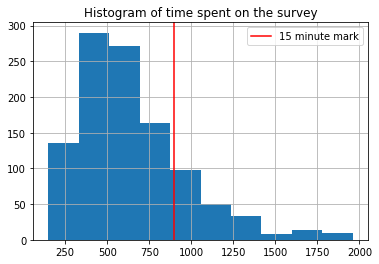

In [13]:
plt.figure()
fig,ax = plt.subplots()
plt.title("Histogram of time spent on the survey")
df[df["Duration (in seconds)"]<=2000]["Duration (in seconds)"].hist(ax=ax)
ax.axvline(x=15*60,color="red",label="15 minute mark")
plt.legend()

### note: about 20 people took more than 2000 seconds

<AxesSubplot:title={'center':'Race distribution'}>

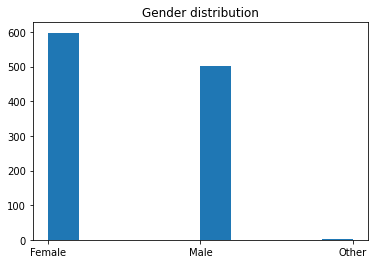

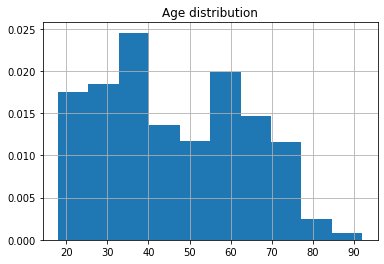

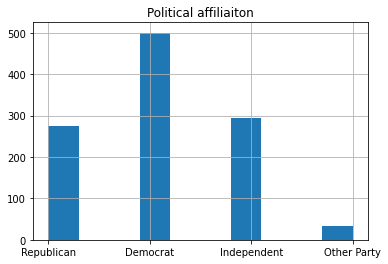

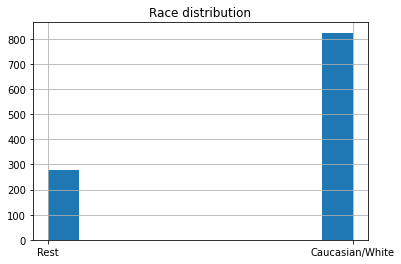

In [14]:
plt.figure()
plt.title("Gender distribution")
plt.hist(df["gender"])

plt.figure()
plt.title("Age distribution")
df["age"].hist(density=True)

plt.figure()
plt.title("Political affiliaiton")
df["polparty"].hist()

plt.figure()
def white(row):
    if row == "Caucasian/White":
        return row
    else:
        return "Rest"
df["white"] = df["race"].apply(white)
plt.title("Race distribution")
df["white"].hist()
    

<AxesSubplot:title={'center':'Post-treatment response to Question - How likely to share?'}, xlabel='Likelihoood of sharing'>

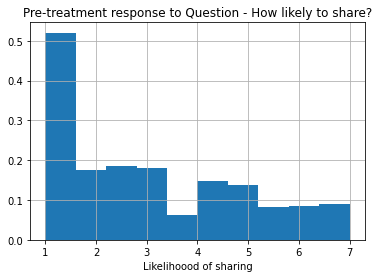

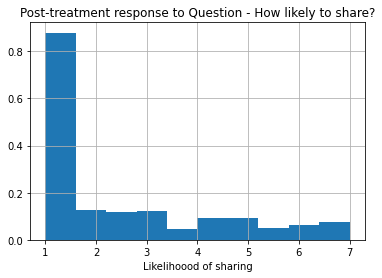

In [15]:
plt.figure()
plt.title("Pre-treatment response to Question - How likely to share?")
plt.xlabel("Likelihoood of sharing")
df[["prequiz_q1_2","prequiz_q2_2","prequiz_q3_2"]].mean(axis=1).hist(density=True)

plt.figure()
plt.title("Post-treatment response to Question - How likely to share?")
plt.xlabel("Likelihoood of sharing")
df[["postquiz_q1_2","postquiz_q2_2","postquiz_q3_2"]].mean(axis=1).hist(density=True)

## news_reliable

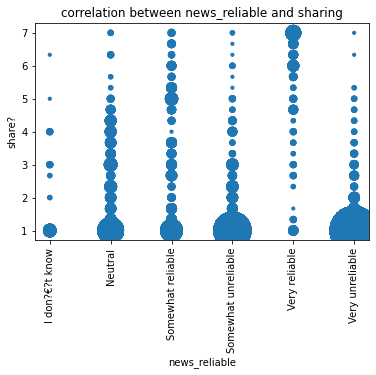

In [16]:
df["delta"] = df["post_avg"] - df["pre_avg"]

news_map = dict(zip(df["news_reliable"].astype("category").cat.codes, df["news_reliable"]))
df["news_reliable"] = df["news_reliable"].astype('category').cat.codes

x = df["news_reliable"]
y = df[["postquiz_q1_2","postquiz_q2_2","postquiz_q3_2"]].mean(axis=1)
c = Counter(zip(x,y))
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
plt.title("correlation between news_reliable and sharing")
plt.xlabel("news_reliable",)
plt.xticks(list(news_map.keys()),list(news_map.values()),rotation=90)
plt.ylabel("share?")
plt.scatter(x,y,s=s)



# pre vs post score

Correlation between pre and post test scores


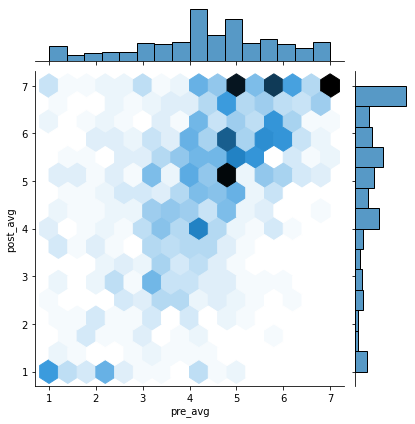

In [17]:
x = df["pre_avg"]
y = df["post_avg"]
c = Counter(zip(x,y))
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
#plt.plot(range(8),range(8),c="red",label="pre test score = post test score")
#plt.scatter(x,y,s=s)
print("Correlation between pre and post test scores")
sns.jointplot(x=x, y=y, kind='hex')

# change in scores across treatment groups

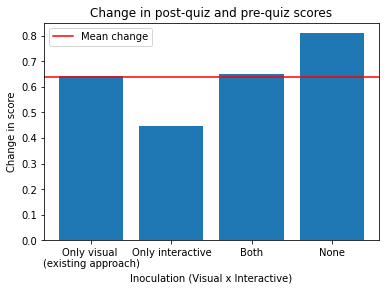

In [18]:



ninv = (df["post_avg"]-df["pre_avg"])[df["treatment"]=="non-interactive-novisual"].mean()

niv = (df["post_avg"]-df["pre_avg"])[df["treatment"]=="non-interactive-visual"].mean()

iv = (df["post_avg"]-df["pre_avg"])[df["treatment"]=="Interactive-visual"].mean()

inv = (df["post_avg"]-df["pre_avg"])[df["treatment"]=="Interactive-novisual"].mean()

# plt.figure()
# plt.title("Mean difference in post - pre")
# plt.plot()
# plt.bar(["Only visual","Only interactive","None","Both"],[niv,inv,ninv,iv])

fig,ax= plt.subplots()
plt.bar(["Only visual \n(existing approach)","Only interactive","Both","None"],[niv,inv,iv,ninv])
# use axhline
mean = (df["post_avg"]-df["pre_avg"]).mean()
ax.axhline(mean,color="red",label="Mean change")
plt.title("Change in post-quiz and pre-quiz scores")
plt.ylabel("Change in score")
plt.xlabel("Inoculation (Visual x Interactive)")
plt.legend()

#### percentage change

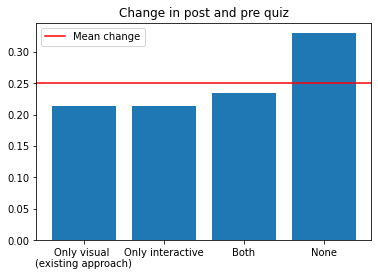

In [19]:
df["percent_change"] = (df["post_avg"]-df["pre_avg"])/df["pre_avg"]

ninv = df["percent_change"][df["treatment"]=="non-interactive-novisual"].mean()

niv = df["percent_change"][df["treatment"]=="non-interactive-visual"].mean()

iv = df["percent_change"][df["treatment"]=="Interactive-visual"].mean()

inv = df["percent_change"][df["treatment"]=="Interactive-novisual"].mean()

# plt.figure()
# plt.title("Mean difference in post - pre")
# plt.plot()
# plt.bar(["Only visual","Only interactive","None","Both"],[niv,inv,ninv,iv])

fig,ax= plt.subplots()
plt.bar(["Only visual \n(existing approach)","Only interactive","Both","None"],[niv,inv,iv,ninv])
# use axhline
mean = df["percent_change"].mean()
ax.axhline(mean,color="red",label="Mean change")
plt.title("Change in post and pre quiz")
plt.legend()

# checking different response types (>5, <5)

In [20]:
num_pre_inoc = df.loc[(df["pre_avg"] >= 5)].shape[0]
print("Number of pre-inoculated: ",num_pre_inoc)
print("Percent pre-inoculated: ",num_pre_inoc*100.0/df.shape[0])

Number of pre-inoculated:  467
Percent pre-inoculated:  42.37749546279492


In [21]:
cond_over_conf = df.loc[(df["pre_avg"] <= 3) & (df["post_avg"] >= 5)].shape[0]
print("People w <=3 pre and move to >=5: ",cond_over_conf)
print("Percent of people <=3 to >=5: ",cond_over_conf*100.0/df.loc[df["pre_avg"] <= 3].shape[0])

People w <=3 pre and move to >=5:  67
Percent of people <=3 to >=5:  29.646017699115045


## "compliance" of visual intervention

Non-interactive visual EX2 time log missing from CSV file...

In [22]:
inv = df[["inv_ex4_t_Page Submit","inv_ex3_t_Page Submit","inv_ex2_t_Page Submit","inv_ex1_t_Page Submit"]].dropna(axis=0).astype(float).mean(axis=1).mean()
ninv = df[["ninv_ex4_t_Page Submit","ninv_ex3_t_Page Submit","ninv_ex2_t_Page Submit","ninv_ex1_t_Page Submit"]].dropna(axis=0).astype(float).mean(axis=1).mean()
niv = df[["niv_ex4_t_Page Submit","niv_ex3_t_Page Submit","niv_ex1_t_Page Submit"]].dropna(axis=0).astype(float).mean(axis=1).mean()
iv = df[["ex4_t_Page Submit","ex3_t_Page Submit","ex2_t_Page Submit","ex1_t_Page Submit"]].dropna(axis=0).astype(float).mean(axis=1).mean()

In [23]:
num_niv = df.loc[df.treatment == "non-interactive-visual"].shape[0]
num_ninv = df.loc[df.treatment == "non-interactive-novisual"].shape[0]
num_iv = df.loc[df.treatment == "interactive-visual"].shape[0]
num_inv = df.loc[df.treatment == "interactive-novisual"].shape[0]

<BarContainer object of 2 artists>

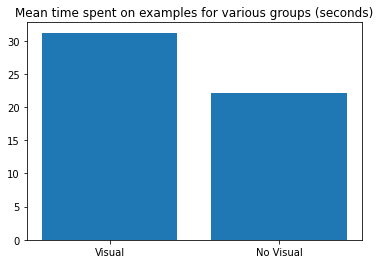

In [24]:
vi = ( num_niv * niv + num_iv * iv ) / (num_niv + num_iv)
nvi = ( num_ninv * ninv + num_inv * inv ) / (num_ninv + num_inv)

plt.figure()
plt.title("Mean time spent on examples for various groups (seconds)")
plt.bar(["Visual","No Visual"],[vi,nvi])